In [ ]:
import numpy as np
import os
import os.path as path
from PIL import Image as im
import shutil
from skimage import exposure
import time
import cv2
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import heapq
def create_circular_mask(h, w, radius1, radius2, center=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))

    Y, X = np.ogrid[:h, :w]

    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    mask = (dist_from_center <= radius1) & (dist_from_center >= radius2)
    return mask

mask1 = create_circular_mask(2048,2048, radius1 = 520.10, radius2 = 508.17)
mask2 = create_circular_mask(2048,2048, radius1 = 597.73, radius2 = 588.01)
mask3 = create_circular_mask(2048,2048, radius1 = 842.05, radius2 = 832.20)
mask4 = create_circular_mask(2048,2048, radius1 = 988.82, radius2 = 976.67)


#filePath1 = should be defined
im1 = im.open(filePath1)
im2 = np.array(im1)
aa = im.fromarray(np.uint8(im2))

#images with each of the four masks 
m1in = aa * mask1
m2in = aa * mask2
m3in = aa * mask3
m4in = aa * mask4

#intenisty values for each mask
v1 = np.mean(m1in)
v2 = np.mean(m2in)
v3 = np.mean(m3in)
v4 = np.mean(m4in)

#return four values of intensity 
print(v1,v2,v3,v4)

create a list of all files

In [17]:
import os
import pandas as pd

# folder path
dir_path = r'/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_1/ti64_PB1_darkCor'

# list to store files
filenames = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filenames.append(path)
files = pd.DataFrame(filenames)
files.to_csv('MaskingJobsList.csv',header=False)

get all values into one df

In [29]:
import os
import pandas as pd
column_names = ["ss1", "ss2","ss3","ss4"]
pb1 = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_7/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_7/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        pb1.loc[len(pb1.index)] = new_items 
    except:
        new_items = ['error','error','error','error']
        pb1.loc[len(pb1.index)] = new_items 

In [30]:
pb1.to_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb1_intenisty.csv')

In [31]:
print(pb1.ss1.idxmin())
print(pb1.ss2.idxmin())
print(pb1.ss3.idxmin())
print(pb1.ss4.idxmin())

843
843
843
843


In [32]:
pb1.drop(index=pb1.index[843], axis=0, inplace=True)
pb1

ss1       ss2       ss3       ss4
0     0.854815  0.451617  0.539658  0.746008
1     0.504945  0.308627  0.760103  0.501588
2     0.860037  0.452695  0.529832  0.739474
3     0.875247  0.461012  0.543124  0.760089
4     0.870820  0.461016  0.544945  0.759587
...        ...       ...       ...       ...
1073  0.869616  0.457286  0.536380  0.751002
1074  0.876041  0.464446  0.547742  0.764548
1075  0.871587  0.463336  0.541162  0.757455
1076  0.852489  0.452495  0.547162  0.750393
1077  0.871422  0.459361  0.540967  0.754843

[1077 rows x 4 columns]

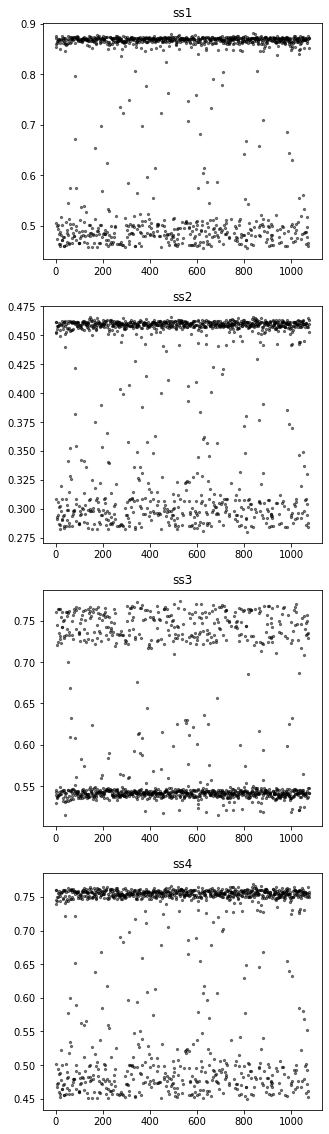

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 20))
plt.subplot(411,title =  'ss1')
plt.scatter(pb1.index,pb1.ss1,c = 'black',s = 5,alpha = 0.5)
plt.subplot(412,title =  'ss2')
plt.scatter(pb1.index, pb1.ss2,c = 'black',s = 5,alpha = 0.5)
plt.subplot(413,title =  'ss3')
plt.scatter(pb1.index, pb1.ss3,c = 'black',s = 5,alpha = 0.5)
plt.subplot(414,title =  'ss4')
plt.scatter(pb1.index, pb1.ss4,c = 'black',s = 5,alpha = 0.5)


In [36]:
pb1.ss1.describe()

count    1077.000000
mean        0.733854
std         0.178980
min         0.455039
25%         0.499947
50%         0.863586
75%         0.870225
max         0.881021
Name: ss1, dtype: float64

In [37]:
pb1.ss2.describe()

count    1077.000000
mean        0.403419
std         0.074441
min         0.280065
25%         0.307226
50%         0.457263
75%         0.460162
max         0.465729
Name: ss2, dtype: float64

In [38]:
pb1.ss3.describe()

count    1077.000000
mean        0.606005
std         0.093943
min         0.514423
25%         0.540322
50%         0.544008
75%         0.728254
max         0.774362
Name: ss3, dtype: float64

In [39]:
pb1.ss4.describe()

count    1077.000000
mean        0.661080
std         0.126997
min         0.449267
25%         0.498172
50%         0.750593
75%         0.756752
max         0.768898
Name: ss4, dtype: float64

In [3]:
import pandas as pd
jobs = pd.read_csv('MaskingJobsList.csv')
jobs.iloc[843]

0                                                        844
ff_002653_ge2_0001_v0_1.tiff    ff_003172_ge2_0001_v0_1.tiff
Name: 843, dtype: object

slurm script for sum of intensities

In [20]:
import pandas as pd
pb = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb1_intenisty.csv',index_col = 0 )
pb

ss1       ss2       ss3       ss4
0     0.854815  0.451617  0.539658  0.746008
1     0.504945  0.308627  0.760103  0.501588
2     0.860037  0.452695  0.529832  0.739474
3     0.875247  0.461012  0.543124  0.760089
4     0.870820  0.461016  0.544945  0.759587
...        ...       ...       ...       ...
1073  0.869616  0.457286  0.536380  0.751002
1074  0.876041  0.464446  0.547742  0.764548
1075  0.871587  0.463336  0.541162  0.757455
1076  0.852489  0.452495  0.547162  0.750393
1077  0.871422  0.459361  0.540967  0.754843

[1078 rows x 4 columns]

In [21]:
pb.ss1 = pb.ss1*4124672
pb.ss2 = pb.ss2*4124672
pb.ss3 = pb.ss3*4124672
pb.ss4 = pb.ss4*4124672

pb.drop(index=pb.index[843], axis=0, inplace=True)

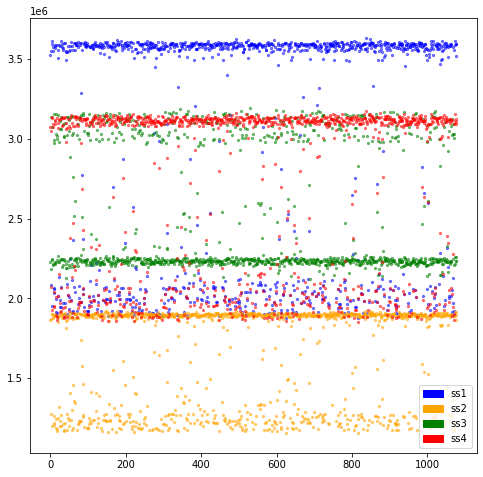

In [47]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(pb.index,pb.ss1,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb.index,pb.ss2,c = 'orange',s = 5,alpha = 0.5)
plt.scatter(pb.index,pb.ss3,c = 'green',s = 5,alpha = 0.5)
plt.scatter(pb.index,pb.ss4,c = 'red',s = 5,alpha = 0.5)

redpatch = mpatches.Patch(color='blue', label='ss1')
orangepatch = mpatches.Patch(color='orange', label='ss2')
greenpatch = mpatches.Patch(color='green', label='ss3')
bluepatch = mpatches.Patch(color='red', label='ss4')

plt.legend(handles=[redpatch,orangepatch,greenpatch,bluepatch])

plt.show()

In [4]:
pb.ss4.describe()[0]

1077.0

In [22]:
stats = []
def to_dec(num):
    return '%.2E' % Decimal(num)
for i in pb:
    a = []
    for p in range(8):
        a.append('%.2E' % Decimal('%.0f'%pb[i].describe()[p]))
    stats.append(a)
        

In [ ]:
from decimal import Decimal
headers = ['count','mean','std','min','25%','50%','75%','max']
stats = pd.DataFrame(stats,columns  = headers)
stats

count      mean       std       min       25%       50%       75%  \
0  3.00E+00  3.05E+06  8.39E+05  2.08E+06  2.80E+06  3.53E+06  3.54E+06   
1  3.00E+00  1.67E+06  3.42E+05  1.27E+06  1.57E+06  1.86E+06  1.86E+06   
2  3.00E+00  2.52E+06  5.37E+05  2.19E+06  2.21E+06  2.23E+06  2.68E+06   
3  3.00E+00  2.73E+06  5.74E+05  2.07E+06  2.56E+06  3.05E+06  3.06E+06   

        max  
0  3.55E+06  
1  1.87E+06  
2  3.14E+06  
3  3.08E+06

<AxesSubplot:>

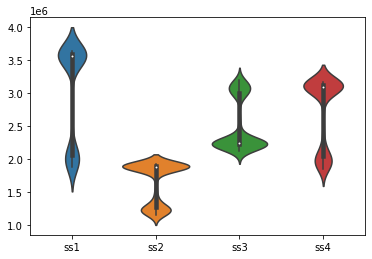

In [41]:
import seaborn as sns
sns.violinplot(data=pb)

v_2 

In [2]:
import os
import pandas as pd

# folder path
dir_path = r'/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB1_darkCor'

# list to store files
filenames = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filenames.append(path)
files = pd.DataFrame(filenames)
files.to_csv('MaskingJobsList_v_2.csv',header=False)

In [ ]:
import numpy as np
import os
import os.path as path
from PIL import Image as im
import shutil
from skimage import exposure
import time
import cv2
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import heapq
def create_circular_mask(h, w, radius1, radius2, center=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))

    Y, X = np.ogrid[:h, :w]

    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    mask = (dist_from_center <= radius1) & (dist_from_center >= radius2)
    return mask

mask1 = create_circular_mask(2048,2048, radius1 = 549, radius2 = 514)
mask2 = create_circular_mask(2048,2048, radius1 = 632, radius2 = 594)
mask3 = create_circular_mask(2048,2048, radius1 = 886, radius2 = 850)


#filePath1 = should be defined
im1 = im.open(filePath1)
im2 = np.array(im1)
aa = im.fromarray(np.uint8(im2))

#images with each of the four masks 
m1in = aa * mask1
m2in = aa * mask2
m3in = aa * mask3

#intenisty values for each mask
v1 = np.sum(m1in)
v2 = np.sum(m2in)
v3 = np.sum(m3in)

#return four values of intensity 
print(v1,v2,v3)

In [3]:
files

0
0     ff_003499_ge2_0001v0_2.tiff
1     ff_003022_ge2_0001v0_2.tiff
2     ff_003262_ge2_0001v0_2.tiff
3     ff_002677_ge2_0001v0_2.tiff
4     ff_003012_ge2_0001v0_2.tiff
...                           ...
1073  ff_003394_ge2_0001v0_2.tiff
1074  ff_002966_ge2_0001v0_2.tiff
1075  ff_003248_ge2_0001v0_2.tiff
1076  ff_002773_ge2_0001v0_2.tiff
1077  ff_003144_ge2_0001v0_2.tiff

[1078 rows x 1 columns]

for v_2

In [4]:
import os
import pandas as pd
column_names = ["ss1", "ss2","ss3"]
pb1 = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_9/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_9/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        pb1.loc[len(pb1.index)] = new_items 
    except:
        new_items = ['error','error','error']
        pb1.loc[len(pb1.index)] = new_items 

In [49]:
pb1 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb1_intenisty_v_2.csv',index_col=False)

In [50]:
print(pb1.ss1.idxmin())
print(pb1.ss2.idxmin())
print(pb1.ss3.idxmin())


84
84
84


In [54]:
import pandas as pd
pb1 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb1_intenisty_v_2.csv',index_col=0)
pb1.drop(index=pb1.index[84], axis=0, inplace=True)
pb1

ss1        ss2         ss3
0      8844674.0  8772115.0  11684032.0
1     10125680.0  9653177.0  13914531.0
2     10215167.0  9719863.0  14086110.0
3     10320843.0  9717267.0  13879866.0
4     10152246.0  9670716.0  13962166.0
...          ...        ...         ...
1073   9045878.0  8885990.0  11888124.0
1074  10127011.0  9685749.0  13922988.0
1075  10172683.0  9729959.0  14088731.0
1076  10290419.0  9786174.0  13993695.0
1077  10307443.0  9830429.0  14225782.0

[1077 rows x 3 columns]

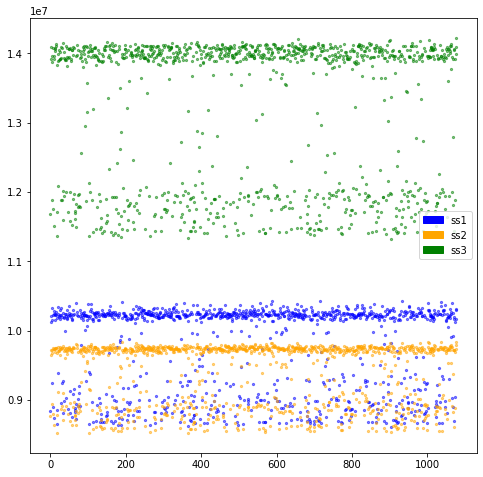

In [11]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(pb1.index,pb1.ss1,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb1.index,pb1.ss2,c = 'orange',s = 5,alpha = 0.5)
plt.scatter(pb1.index,pb1.ss3,c = 'green',s = 5,alpha = 0.5)

redpatch = mpatches.Patch(color='blue', label='ss1')
orangepatch = mpatches.Patch(color='orange', label='ss2')
greenpatch = mpatches.Patch(color='green', label='ss3')

plt.legend(handles=[redpatch,orangepatch,greenpatch])

plt.show()

<AxesSubplot:>

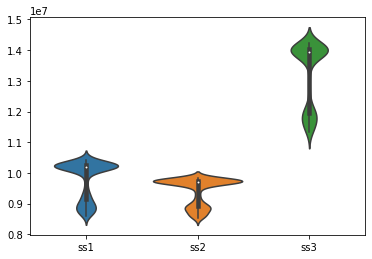

In [12]:
import seaborn as sns
sns.violinplot(data=pb1)

In [55]:
stats = []
for i in pb1:
    a = []
    for p in range(8):
        a.append('%.2E' % Decimal('%.0f'%pb1[i].describe()[p]))
    stats.append(a)
headers = ['count','mean','std','min','25%','50%','75%','max']
stats = pd.DataFrame(stats,columns  = headers)
stats

count      mean       std       min       25%       50%       75%  \
0  1.08E+03  9.80E+06  6.11E+05  8.61E+06  9.14E+06  1.02E+07  1.02E+07   
1  1.08E+03  9.42E+06  4.38E+05  8.52E+06  8.92E+06  9.71E+06  9.75E+06   
2  1.08E+03  1.32E+07  1.05E+06  1.13E+07  1.19E+07  1.39E+07  1.40E+07   

        max  
0  1.04E+07  
1  9.83E+06  
2  1.42E+07

Automated mask creation

In [5]:
import os
import os.path as path
from PIL import Image as im
import shutil
from skimage import exposure
import time
import cv2
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import heapq
import numpy as np

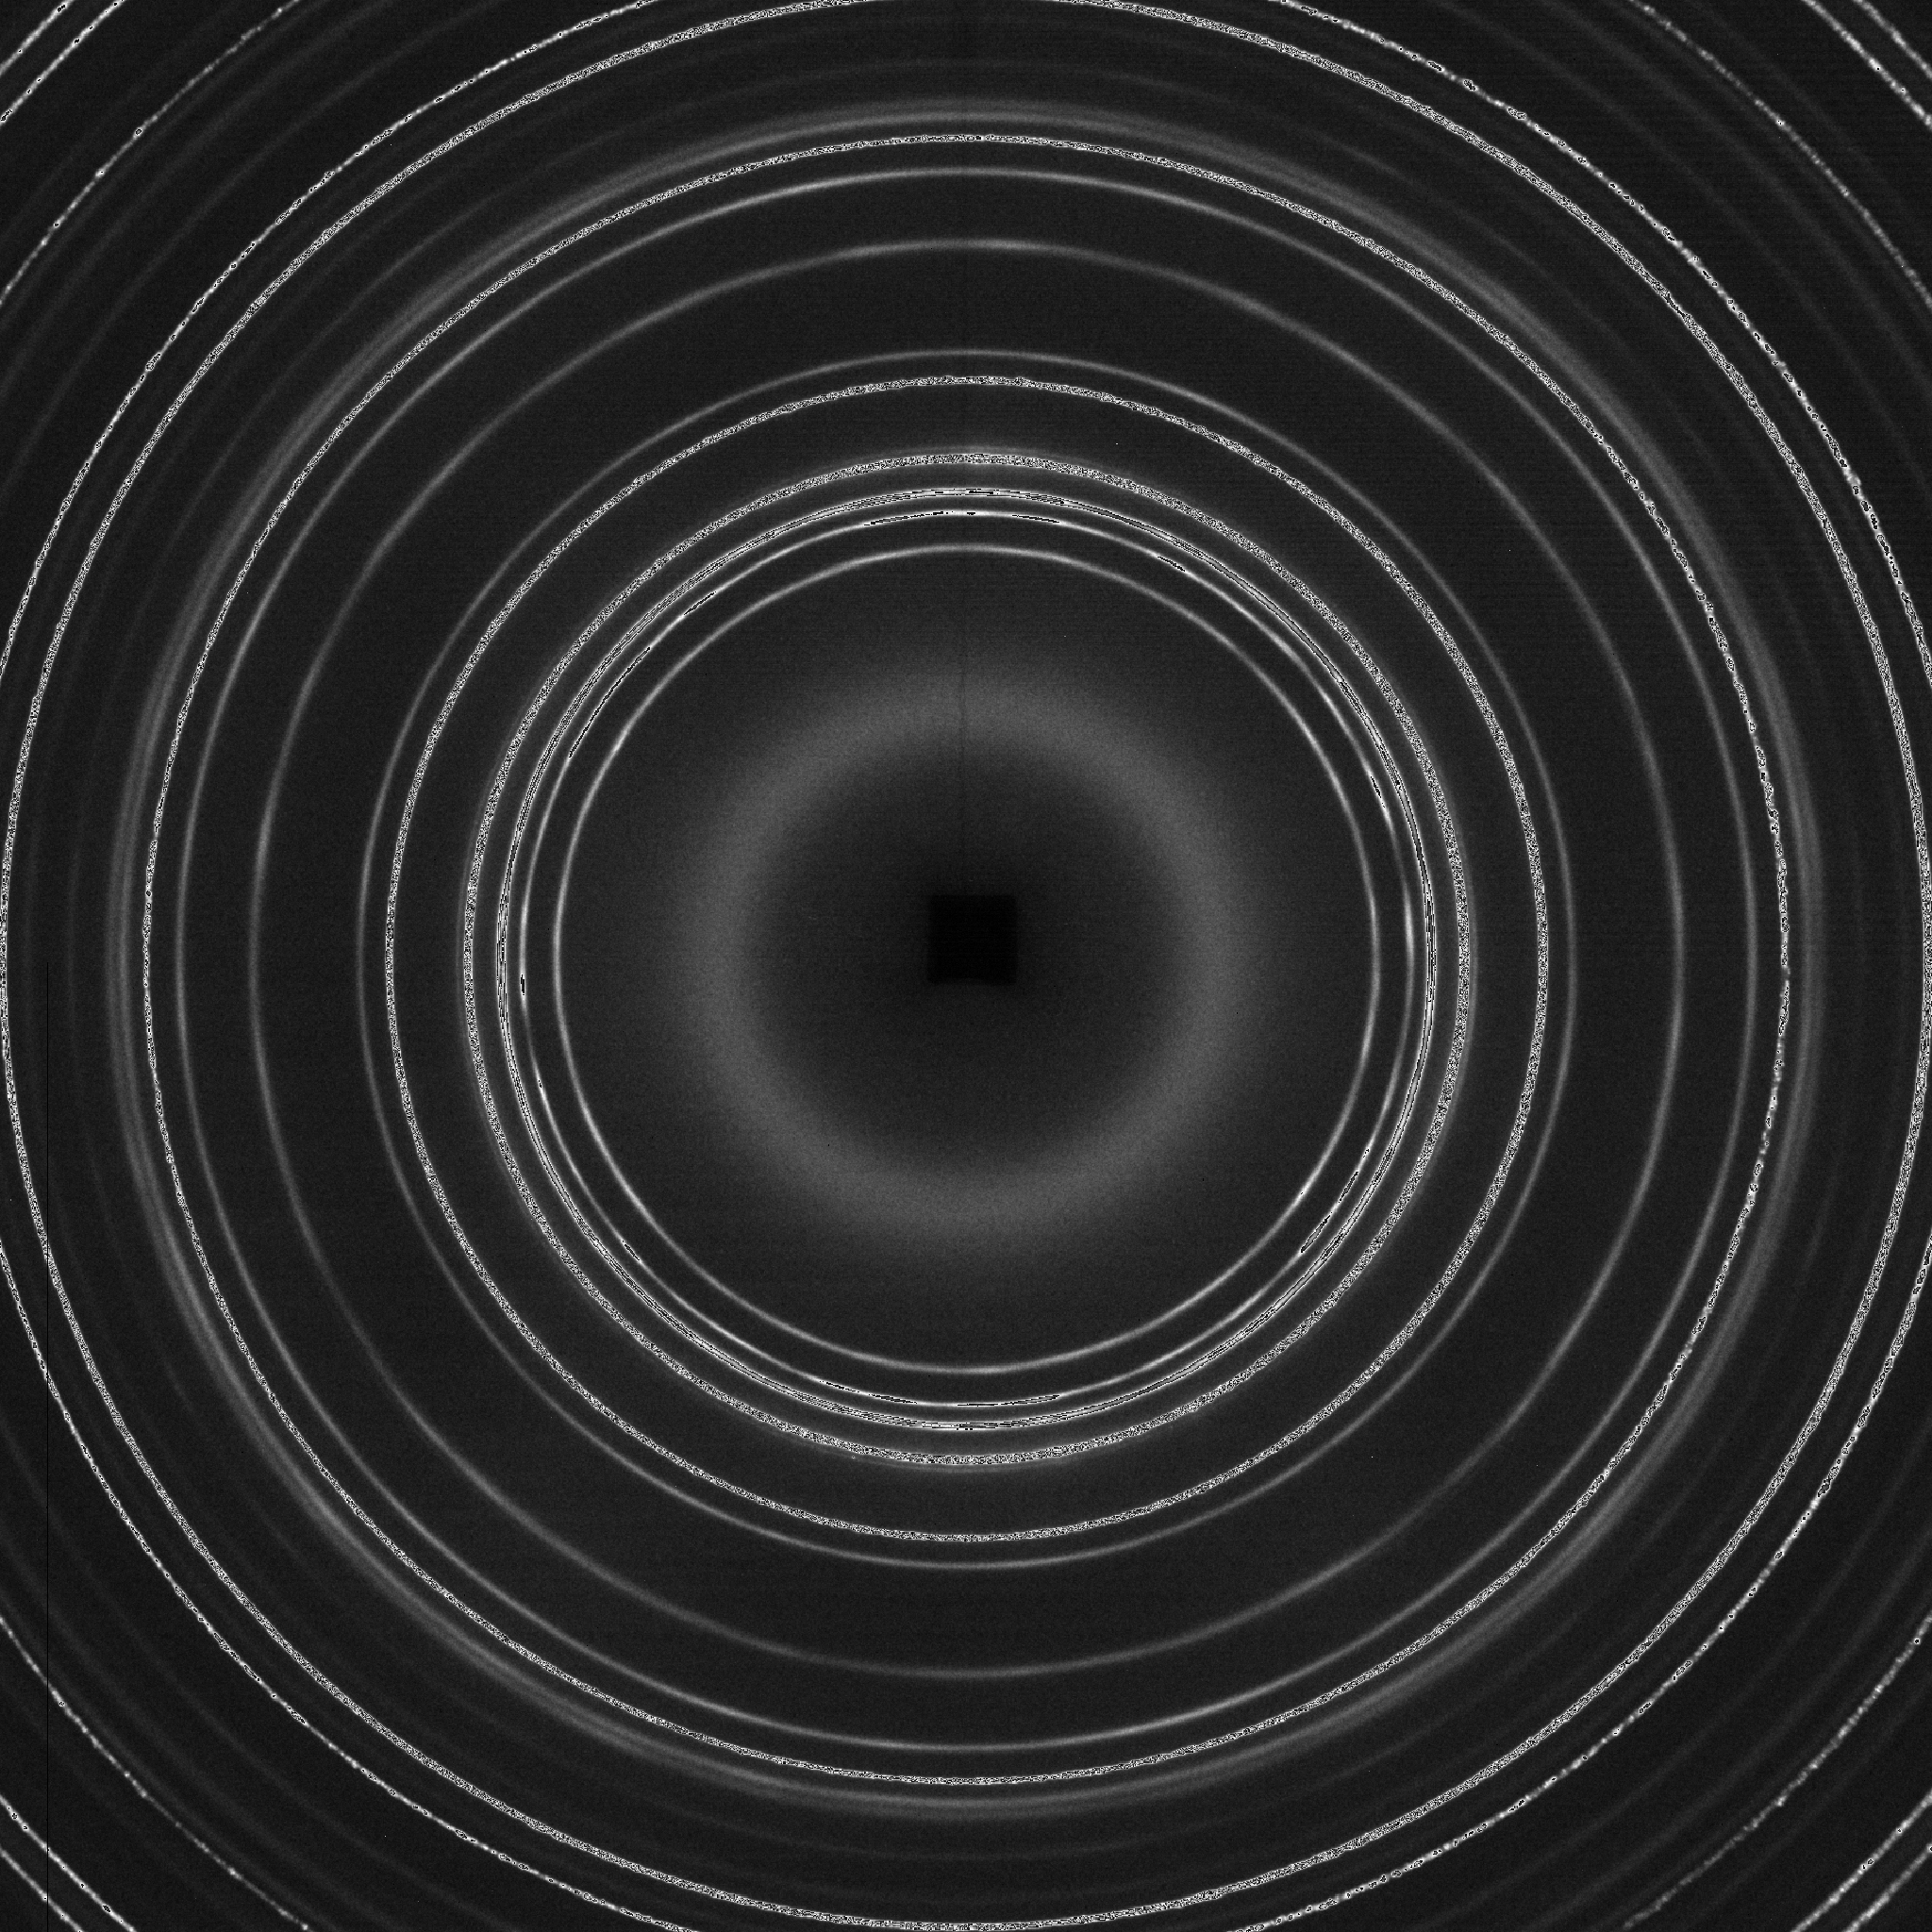

In [14]:
filePath1 = '/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB1_darkCor/ff_002566_ge2_0001v0_2.tiff'
im1 = im.open(filePath1)
im2 = np.array(im1)
aa = im.fromarray(np.uint8(im2))
aa

In [25]:
import cv2
import numpy as np

img = cv2.imread('/home/zxu4/cv2-resize-image-original.png', cv2.IMREAD_UNCHANGED)

#convert img to grey
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
#save image
cv2.imwrite('/home/zxu4/contours.png',img_contours) 

True

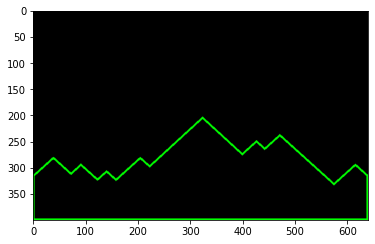

In [27]:
imageconout = cv2.imread('/home/zxu4/contours.png')
plt.imshow(imageconout)

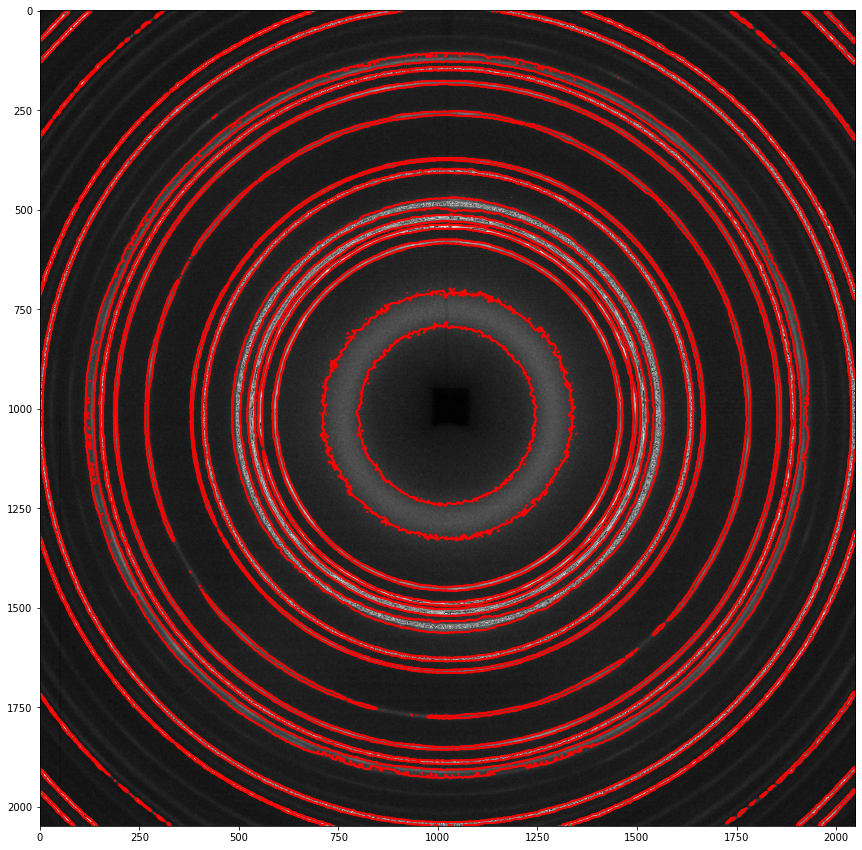

In [2]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)
from skimage.color import rgb2gray
import skimage.io
from PIL import Image

#important when dealing with big images
Image.MAX_IMAGE_PIXELS = None

#function for storing results of evolution
def store_evolution_in(lst):
#Returns a callback function to store the evolution of the level sets in the given list.
    def _store(x):
        lst.append(np.copy(x))
    return _store

#loading the image for segmentation

img = skimage.io.imread(fname='/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB1_darkCor/ff_002566_ge2_0001v0_2.tiff')
#img = img[:,:,:3]
#image = rgb2gray(img)
image = img
   
# this is the optimal threshold for this partilar sample (0.7)
image = (image > 55)*1

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)

# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, num_iter=35, init_level_set=init_ls,
                             smoothing=3, iter_callback=callback)

#show the original image
plt.figure(figsize=(15, 15))
im2 = np.array(img)
aa = im.fromarray(np.uint8(im2))
plt.imshow(aa,cmap = 'gray')
contours = [] 

#show the contour 
contour1 = plt.contour(evolution[2], [0.9], colors='r')
contour2 = plt.contour(evolution[7], [0.9], colors='r')
contour3 = plt.contour(evolution[-1], [0.9], colors='r')
contours.append(contour1)
contours.append(contour2)
contours.append(contour3)
xcoord = []
ycoord = [] 

#combine the image from each contour layer into one layer
for cnt in contours: 
    for item in cnt.collections:
        for i in item.get_paths():
            v = i.vertices
            x = v[:, 0]
            y = v[:, 1]
            xcoord = xcoord + x.tolist()
            ycoord = ycoord + y.tolist()
        

/tmp/ipykernel_147500/3772207287.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


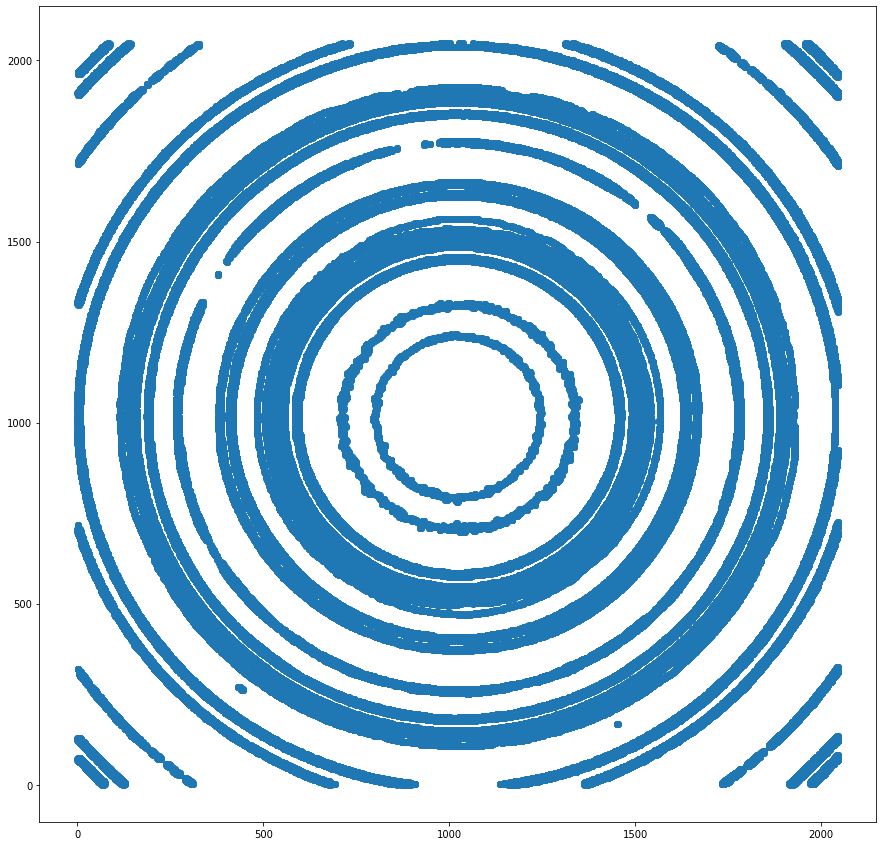

In [26]:
plt.figure(figsize=(15, 15))
from scipy.ndimage.filters import gaussian_filter
data = np.column_stack((xcoord, ycoord))
data = gaussian_filter(data, sigma=.1)
plt.scatter(data[:,0],data[:,1])

In [43]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=25, min_samples=100)
db.fit(np.column_stack((xcoord , ycoord)))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

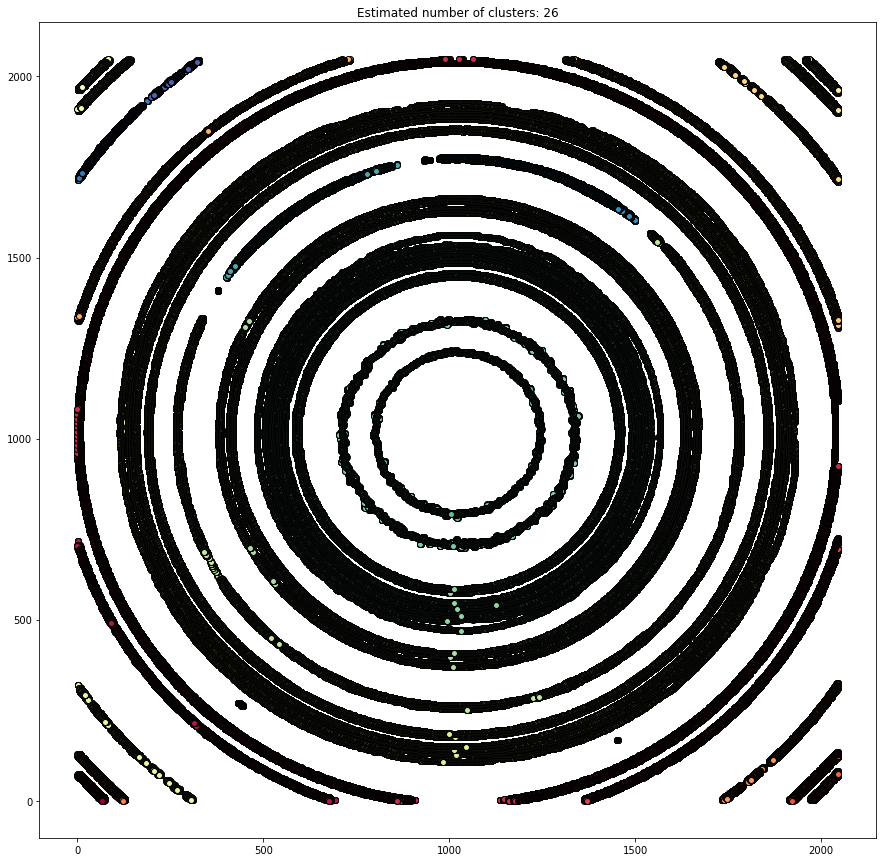

In [46]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
plt.figure(figsize=(15, 15))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = np.column_stack((xcoord , ycoord))[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
        
    xy = np.column_stack((xcoord , ycoord))[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [49]:
labels.size

436478

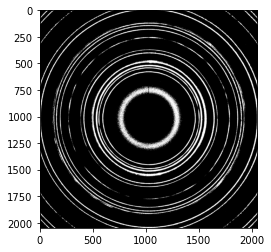

In [44]:
img = skimage.io.imread(fname='/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB1_darkCor/ff_002566_ge2_0001v0_2.tiff')
#img = img[:,:,:3]
#image = rgb2gray(img)
image = img
   
# this is the optimal threshold for this partilar sample (0.7)
image = (image > 70)
plt.imshow(image,cmap = 'gray')

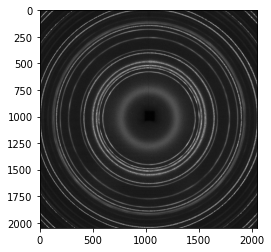

In [39]:
from PIL import Image as im
img = skimage.io.imread(fname='/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB1_darkCor/ff_002566_ge2_0001v0_2.tiff')
im2 = np.array(img)
aa = im.fromarray(np.uint8(im2))
plt.imshow(aa,cmap = 'gray')

In [1]:
import os
import pandas as pd

# folder path
dir_path = r'/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB2_darkCor'

# list to store files
filenames = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filenames.append(path)
files = pd.DataFrame(filenames)
files.to_csv('MaskingJobsList_v0_2_PB2.csv',header=False)

In [2]:
import os
import pandas as pd

# folder path
dir_path = r'/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB3_darkCor'

# list to store files
filenames = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filenames.append(path)
files = pd.DataFrame(filenames)
files.to_csv('MaskingJobsList_v0_2_PB3.csv',header=False)

concat PB2 data

In [53]:
import os
import pandas as pd
column_names = ["ss1", "ss2","ss3"]
pb2 = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_10/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_10/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        pb2.loc[len(pb2.index)] = new_items 
    except:
        new_items = ['error','error','error']
        pb2.loc[len(pb2.index)] = new_items 

In [68]:
pb2.to_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb2_intenisty_v_2.csv')

In [79]:
pb2 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb2_intenisty_v_2.csv',index_col = 0)
pb2.loc[pb2['ss1'] == 'error']

ss1    ss2    ss3
296  error  error  error
304  error  error  error

In [72]:
pb2

ss1        ss2         ss3
0     10067337.0  9674863.0  13679387.0
1      8952340.0  8587764.0  11290609.0
2      9877965.0  9514328.0  13904620.0
3     10001077.0  9604212.0  13418822.0
4      9883891.0  9512906.0  13453651.0
...          ...        ...         ...
1097  10104659.0  9648768.0  13534739.0
1098   8902806.0  8531374.0  11261947.0
1099   9119180.0  8756810.0  11544045.0
1100  10057145.0  9646561.0  13562398.0
1101  10003663.0  9611875.0  13659619.0

[1102 rows x 3 columns]

In [64]:
locerror = pd.read_csv('MaskingJobsList_v0_2_PB2.csv',index_col=0,header=None)
print(locerror.loc[296])
print(locerror.loc[304])

1    ff_006562_ge2_0001v0_2.tiff
Name: 296, dtype: object
1    ff_007113_ge2_0001v0_2.tiff
Name: 304, dtype: object


In [56]:
import numpy as np
import os
import os.path as path
from PIL import Image as im
import shutil
from skimage import exposure
import time
import cv2
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import heapq
def create_circular_mask(h, w, radius1, radius2, center=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))

    Y, X = np.ogrid[:h, :w]

    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    mask = (dist_from_center <= radius1) & (dist_from_center >= radius2)
    return mask

mask1 = create_circular_mask(2048,2048, radius1 = 549, radius2 = 514)
mask2 = create_circular_mask(2048,2048, radius1 = 632, radius2 = 594)
mask3 = create_circular_mask(2048,2048, radius1 = 886, radius2 = 850)

filePath1 = '/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB2_darkCor/ff_006562_ge2_0001v0_2.tiff'
#filePath1 = should be defined
im1 = im.open(filePath1)
im2 = np.array(im1)
aa = im.fromarray(np.uint8(im2))

#images with each of the four masks 
m1in = aa * mask1
m2in = aa * mask2
m3in = aa * mask3

#intenisty values for each mask
v1 = np.sum(m1in)
v2 = np.sum(m2in)
v3 = np.sum(m3in)

#return four values of intensity 
print(v1,v2,v3)

10124840 9678722 13489710


In [57]:
import numpy as np
import os
import os.path as path
from PIL import Image as im
import shutil
from skimage import exposure
import time
import cv2
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import heapq
def create_circular_mask(h, w, radius1, radius2, center=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))

    Y, X = np.ogrid[:h, :w]

    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    mask = (dist_from_center <= radius1) & (dist_from_center >= radius2)
    return mask

mask1 = create_circular_mask(2048,2048, radius1 = 549, radius2 = 514)
mask2 = create_circular_mask(2048,2048, radius1 = 632, radius2 = 594)
mask3 = create_circular_mask(2048,2048, radius1 = 886, radius2 = 850)

filePath1 = '/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB2_darkCor/ff_007113_ge2_0001v0_2.tiff'
#filePath1 = should be defined
im1 = im.open(filePath1)
im2 = np.array(im1)
aa = im.fromarray(np.uint8(im2))

#images with each of the four masks 
m1in = aa * mask1
m2in = aa * mask2
m3in = aa * mask3

#intenisty values for each mask
v1 = np.sum(m1in)
v2 = np.sum(m2in)
v3 = np.sum(m3in)

#return four values of intensity 
print(v1,v2,v3)

10006969 9624519 13700271


In [80]:
row296 = [10124840,9678722,13489710]
row304 = [10006969,9624519,13700271]
pb2.loc[296] = row296
pb2.loc[304] = row304


In [81]:
pb2.loc[pb2['ss1'] == 'error']

Empty DataFrame
Columns: [ss1, ss2, ss3]
Index: []

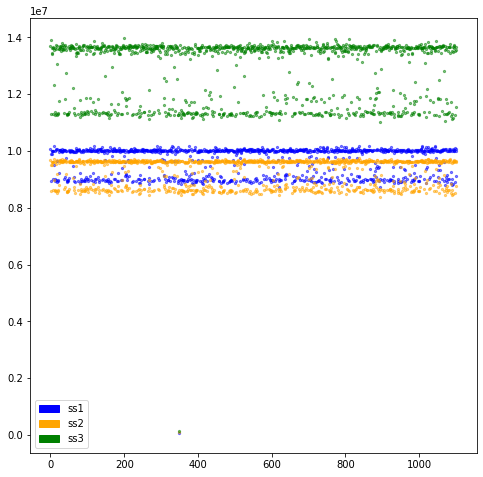

In [59]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(pb2.index,pb2.ss1,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb2.index,pb2.ss2,c = 'orange',s = 5,alpha = 0.5)
plt.scatter(pb2.index,pb2.ss3,c = 'green',s = 5,alpha = 0.5)

redpatch = mpatches.Patch(color='blue', label='ss1')
orangepatch = mpatches.Patch(color='orange', label='ss2')
greenpatch = mpatches.Patch(color='green', label='ss3')

plt.legend(handles=[redpatch,orangepatch,greenpatch])

plt.show()

In [60]:
print(pb2.ss1.idxmin())
print(pb2.ss2.idxmin())
print(pb2.ss3.idxmin())

TypeError: reduction operation 'argmin' not allowed for this dtype

In [82]:
pb2.drop(index=pb2.index[349], axis=0, inplace=True)

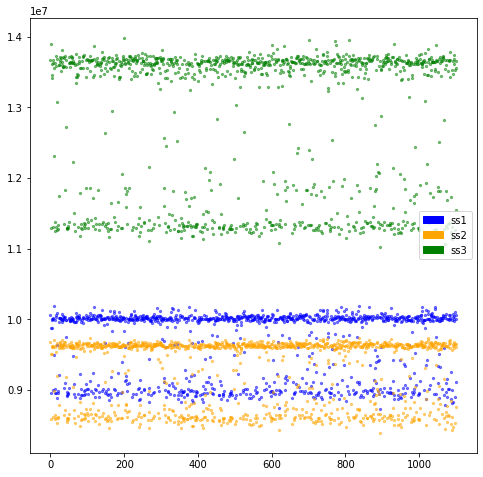

In [97]:
plt.figure(figsize=(8, 8))
plt.scatter(pb2.index,pb2.ss1,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb2.index,pb2.ss2,c = 'orange',s = 5,alpha = 0.5)
plt.scatter(pb2.index,pb2.ss3,c = 'green',s = 5,alpha = 0.5)

redpatch = mpatches.Patch(color='blue', label='ss1')
orangepatch = mpatches.Patch(color='orange', label='ss2')
greenpatch = mpatches.Patch(color='green', label='ss3')

plt.legend(handles=[redpatch,orangepatch,greenpatch])

plt.show()

In [87]:
stats = []
#pb2['ss1'] = pd.to_numeric(pb2['ss1'])
#pb2['ss2'] = pd.to_numeric(pb2['ss2'])
#pb2['ss3'] = pd.to_numeric(pb2['ss3'])
for i in pb2:
    a = []
    for p in range(8):
        a.append('%.2E' % Decimal('%.0f'%pb2[i].describe()[p]))
    stats.append(a)
headers = ['count','mean','std','min','25%','50%','75%','max']
stats = pd.DataFrame(stats,columns  = headers)

In [88]:
stats

count      mean       std       min       25%       50%       75%  \
0  1.10E+03  9.68E+06  4.73E+05  8.73E+06  9.08E+06  9.99E+06  1.00E+07   
1  1.10E+03  9.29E+06  4.64E+05  8.39E+06  8.71E+06  9.61E+06  9.64E+06   
2  1.10E+03  1.29E+07  1.03E+06  1.10E+07  1.16E+07  1.36E+07  1.37E+07   

        max  
0  1.02E+07  
1  9.74E+06  
2  1.40E+07

concat pb3 data

In [65]:
import os
import pandas as pd
column_names = ["ss1", "ss2","ss3"]
pb3 = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_11/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_11/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        pb3.loc[len(pb3.index)] = new_items 
    except:
        new_items = ['error','error','error']
        pb3.loc[len(pb3.index)] = new_items 

In [66]:
pb3.to_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb3_intenisty_v_2.csv')

In [89]:
pb3 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb3_intenisty_v_2.csv',index_col=0)
pb3.loc[pb3['ss1'] == 'error']

ss1    ss2    ss3
415  error  error  error
417  error  error  error
481  error  error  error
764  error  error  error
838  error  error  error

In [2]:
import pandas as pd
locerror = pd.read_csv('MaskingJobsList_v0_2_PB3.csv',index_col=0,header=None)
print(locerror.loc[415])
print(locerror.loc[417])
print(locerror.loc[481])
print(locerror.loc[764])
print(locerror.loc[838])

1    ff_010032_ge2_0001v0_2.tiff
Name: 415, dtype: object
1    ff_009916_ge2_0019v0_2.tiff
Name: 417, dtype: object
1    ti64_PB3_darkCor.avi
Name: 481, dtype: object
1    ti64_PB3_darkCor.gif
Name: 764, dtype: object
1    ti64_PB3_darkCor_f.avi
Name: 838, dtype: object


In [4]:
import numpy as np
import os
import os.path as path
from PIL import Image as im
import shutil
from skimage import exposure
import time
import cv2
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import scipy
import heapq
def aut_mask_intens(filePath1):
    def create_circular_mask(h, w, radius1, radius2, center=None):

        if center is None: # use the middle of the image
            center = (int(w/2), int(h/2))

        Y, X = np.ogrid[:h, :w]

        dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

        mask = (dist_from_center <= radius1) & (dist_from_center >= radius2)
        return mask

    mask1 = create_circular_mask(2048,2048, radius1 = 549, radius2 = 514)
    mask2 = create_circular_mask(2048,2048, radius1 = 632, radius2 = 594)
    mask3 = create_circular_mask(2048,2048, radius1 = 886, radius2 = 850)
    #filePath1 = should be defined
    im1 = im.open(filePath1)
    im2 = np.array(im1)
    aa = im.fromarray(np.uint8(im2))

    #images with each of the four masks 
    m1in = aa * mask1
    m2in = aa * mask2
    m3in = aa * mask3

    #intenisty values for each mask
    v1 = np.sum(m1in)
    v2 = np.sum(m2in)
    v3 = np.sum(m3in)

    #return four values of intensity 
    print(v1,v2,v3)
aut_mask_intens('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB3_darkCor/ff_010032_ge2_0001v0_2.tiff')
aut_mask_intens('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB3_darkCor/ff_009916_ge2_0019v0_2.tiff')




9270561 8057882 9847313
7243443 6958545 9555335


In [90]:
row415 = [9270561,8057882,9847313]
row417 = [7243443,6958545,9555335]
pb3.loc[415] = row415
pb3.loc[417] = row417
#pb3.drop([481, 764,838])
pb3.drop(index=pb3.index[[481, 764,838]], axis=0, inplace=True)



In [20]:
pb3

ss1         ss2         ss3
0     2875664.0   2082826.0   1892369.0
1     9154266.0   7965493.0  10121496.0
2     7502551.0   7051350.0   8888430.0
3     9136989.0   8133411.0   9802152.0
4     9168016.0   8091231.0   9760737.0
..          ...         ...         ...
858  13716162.0  11911182.0  17617848.0
859   9090626.0   7999150.0   9860457.0
860   9650216.0   9231466.0  12904155.0
861  13515449.0  11492943.0  16684373.0
862   9070421.0   7994070.0   9851715.0

[860 rows x 3 columns]

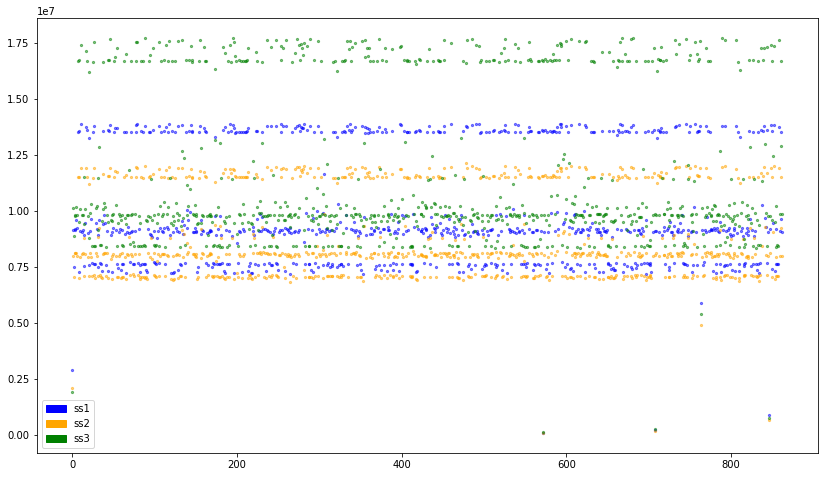

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.scatter(pb3.index,pb3.ss1,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb3.index,pb3.ss2,c = 'orange',s = 5,alpha = 0.5)
plt.scatter(pb3.index,pb3.ss3,c = 'green',s = 5,alpha = 0.5)

redpatch = mpatches.Patch(color='blue', label='ss1')
orangepatch = mpatches.Patch(color='orange', label='ss2')
greenpatch = mpatches.Patch(color='green', label='ss3')

plt.legend(handles=[redpatch,orangepatch,greenpatch])

plt.show()

In [91]:
stats = []
pb3['ss1'] = pd.to_numeric(pb3['ss1'])
pb3['ss2'] = pd.to_numeric(pb3['ss2'])
pb3['ss3'] = pd.to_numeric(pb3['ss3'])
for i in pb3:
    a = []
    for p in range(8):
        a.append('%.2E' % Decimal('%.0f'%pb3[i].describe()[p]))
    stats.append(a)
headers = ['count','mean','std','min','25%','50%','75%','max']
stats = pd.DataFrame(stats,columns  = headers)
stats

count      mean       std       min       25%       50%       75%  \
0  8.60E+02  9.93E+06  2.47E+06  8.33E+04  7.65E+06  9.12E+06  1.35E+07   
1  8.60E+02  8.80E+06  1.92E+06  9.39E+04  7.12E+06  8.07E+06  1.15E+07   
2  8.60E+02  1.17E+07  3.47E+06  1.25E+05  9.52E+06  9.84E+06  1.67E+07   

        max  
0  1.39E+07  
1  1.21E+07  
2  1.77E+07

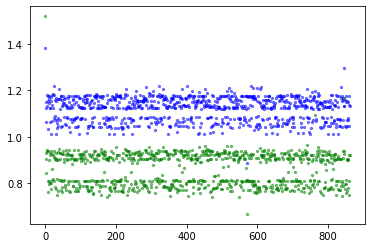

In [5]:
pb3['ss1/ss2'] = pb3['ss1']/pb3['ss2']
pb3['ss1/ss3'] = pb3['ss1']/pb3['ss3']
plt.scatter(pb3.index,pb3['ss1/ss2'],c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb3.index,pb3['ss1/ss3'],c = 'green',s = 5,alpha = 0.5)

ratio plot for pb1 

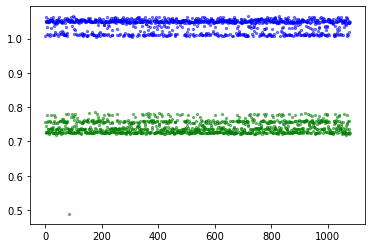

In [46]:
pb1 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb1_intenisty_v_2.csv')
pb1['ss1/ss2'] = pb1['ss1']/pb1['ss2']
pb1['ss1/ss3'] = pb1['ss1']/pb1['ss3']
plt.scatter(pb1.index,pb1['ss1/ss2'],c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb1.index,pb1['ss1/ss3'],c = 'green',s = 5,alpha = 0.5)

ratio for pb2

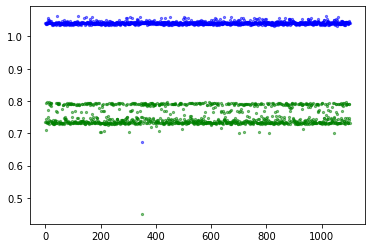

In [59]:
pb2 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb2_intenisty_v_2.csv',index_col= 0)
row296 = [10124840,9678722,13489710]
row304 = [10006969,9624519,13700271]
pb2.loc[296] = row296
pb2.loc[304] = row304
pb2.ss1 = pd.to_numeric(pb2.ss1, errors='coerce').astype('Int32')
pb2.ss2 = pd.to_numeric(pb2.ss2, errors='coerce').astype('Int32')
pb2.ss3 = pd.to_numeric(pb2.ss3, errors='coerce').astype('Int32')

pb2['ss1/ss2'] = pb2['ss1'] / (pb2['ss2'])
pb2['ss1/ss3'] = pb2['ss1'] / pb2['ss3']
plt.scatter(pb2.index,pb2['ss1/ss2'],c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb2.index,pb2['ss1/ss3'],c = 'green',s = 5,alpha = 0.5)

ratio for pb3

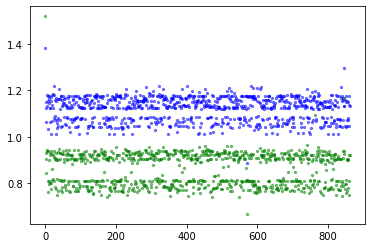

In [67]:
pb3 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb3_intenisty_v_2.csv',index_col = 0)
row415 = [9270561,8057882,9847313]
row417 = [7243443,6958545,9555335]
pb3.loc[415] = row415
pb3.loc[417] = row417
pb3.drop(index=pb3.index[[481, 764,838]], axis=0, inplace=True)
pb3.ss1 = pd.to_numeric(pb3.ss1, errors='coerce').astype('Int32')
pb3.ss2 = pd.to_numeric(pb3.ss2, errors='coerce').astype('Int32')
pb3.ss3 = pd.to_numeric(pb3.ss3, errors='coerce').astype('Int32')

pb3['ss1/ss2'] = pb3['ss1'] / (pb3['ss2'])
pb3['ss1/ss3'] = pb3['ss1'] / pb3['ss3']
plt.scatter(pb3.index,pb3['ss1/ss2'],c = 'blue',s = 5,alpha = 0.5)
plt.scatter(pb3.index,pb3['ss1/ss3'],c = 'green',s = 5,alpha = 0.5)

In [63]:
pb3

ss1         ss2         ss3   ss1/ss2   ss1/ss3
0     2875664.0   2082826.0   1892369.0  1.380655  1.519611
1     9154266.0   7965493.0  10121496.0  1.149240  0.904438
2     7502551.0   7051350.0   8888430.0  1.063988  0.844081
3     9136989.0   8133411.0   9802152.0  1.123390  0.932141
4     9168016.0   8091231.0   9760737.0  1.133080  0.939275
..          ...         ...         ...       ...       ...
858  13716162.0  11911182.0  17617848.0  1.151537  0.778538
859   9090626.0   7999150.0   9860457.0  1.136449  0.921927
860   9650216.0   9231466.0  12904155.0  1.045361  0.747838
861  13515449.0  11492943.0  16684373.0  1.175978  0.810066
862   9070421.0   7994070.0   9851715.0  1.134644  0.920695

[860 rows x 5 columns]

concat alpha and beta rings 

In [7]:
import os
column_names = ['alpha','beta']
alphabeta = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_12/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_12/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        alphabeta.loc[len(alphabeta.index)] = new_items 
    except:
        new_items = ['error','error']
        alphabeta.loc[len(alphabeta.index)] = new_items 


In [8]:
alphabeta.to_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb3_v_2_alphabeta.csv')

In [33]:
alphabeta[alphabeta.alpha == 'error']

alpha   beta
481  error  error
764  error  error
813  error  error
838  error  error

In [34]:
alphabeta.drop(index=alphabeta.index[[481, 764,813,838]], axis=0, inplace=True)

In [35]:
alphabeta[alphabeta.alpha == 'error']

Empty DataFrame
Columns: [alpha, beta]
Index: []

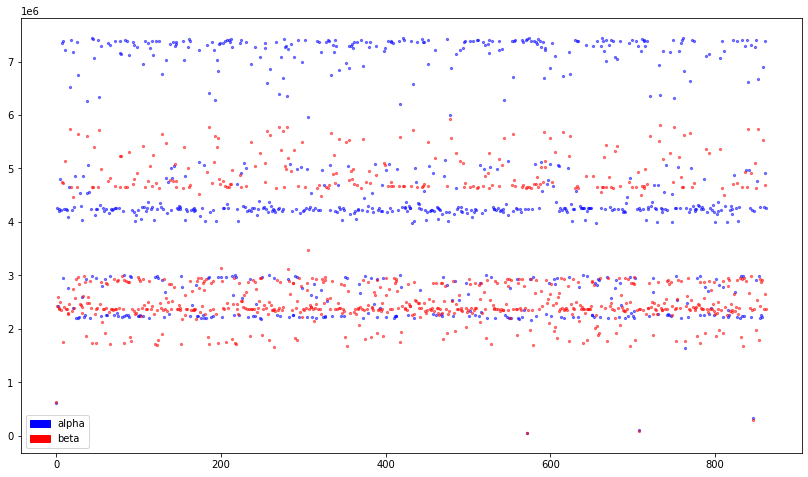

In [38]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.scatter(alphabeta.index,alphabeta.alpha,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(alphabeta.index,alphabeta.beta,c = 'red',s = 5,alpha = 0.5)

bluepatch = mpatches.Patch(color='blue', label='alpha')
redpatch = mpatches.Patch(color='red', label='beta')

plt.legend(handles=[bluepatch,redpatch])

plt.show()

Frequency table for pb1

In [120]:
import pandas as pd
import numpy as np
pb1 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb1_intenisty_v_2.csv')
pb1['ss1'].value_counts(normalize=False, sort=True, ascending=True, bins=960, dropna=True)
freqtable = pd.DataFrame(pb1['ss1'].value_counts(bins = 30))
freqtable.columns = ['Count']
freqtable['Cords'] = freqtable.index
freqtable['sortkey']=freqtable.Cords.map(lambda x : x.left)
freqtable=freqtable.sort_values('sortkey')
freqtable

Count                        Cords       sortkey
(48411.516, 404327.433]          1      (48411.516, 404327.433]  4.841152e+04
(404327.433, 749876.867]         0     (404327.433, 749876.867]  4.043274e+05
(749876.867, 1095426.3]          0      (749876.867, 1095426.3]  7.498769e+05
(1095426.3, 1440975.733]         0     (1095426.3, 1440975.733]  1.095426e+06
(1440975.733, 1786525.167]       0   (1440975.733, 1786525.167]  1.440976e+06
(1786525.167, 2132074.6]         0     (1786525.167, 2132074.6]  1.786525e+06
(2132074.6, 2477624.033]         0     (2132074.6, 2477624.033]  2.132075e+06
(2477624.033, 2823173.467]       0   (2477624.033, 2823173.467]  2.477624e+06
(2823173.467, 3168722.9]         0     (2823173.467, 3168722.9]  2.823173e+06
(3168722.9, 3514272.333]         0     (3168722.9, 3514272.333]  3.168723e+06
(3514272.333, 3859821.767]       0   (3514272.333, 3859821.767]  3.514272e+06
(3859821.767, 4205371.2]         0     (3859821.767, 4205371.2]  3.859822e+06
(4205371.2, 4550920.633]         0     (4205371.2, 4550920.633]  4.205371e+06
(4550920.633, 4896470.067]       0   (4550920.633, 4896470.067]  4.550921e+06
(4896470.067, 5242019.5]         0     (4896470.067, 5242019.5]  4.896470e+06
(5242019.5, 5587568.933]         0     (5242019.5, 5587568.933]  5.242020e+06
(5587568.933, 5933118.367]       0   (5587568.933, 5933118.367]  5.587569e+06
(5933118.367, 6278667.8]         0     (5933118.367, 6278667.8]  5.933118e+06
(6278667.8, 6624217.233]         0     (6278667.8, 6624217.233]  6.278668e+06
(6624217.233, 6969766.667]       0   (6624217.233, 6969766.667]  6.624217e+06
(6969766.667, 7315316.1]         0     (6969766.667, 7315316.1]  6.969767e+06
(7315316.1, 7660865.533]         0     (7315316.1, 7660865.533]  7.315316e+06
(7660865.533, 8006414.967]       0   (7660865.533, 8006414.967]  7.660866e+06
(8006414.967, 8351964.4]         0     (8006414.967, 8351964.4]  8.006415e+06
(8351964.4, 8697513.833]        51     (8351964.4, 8697513.833]  8.351964e+06
(8697513.833, 9043063.267]     196   (8697513.833, 9043063.267]  8.697514e+06
(9043063.267, 9388612.7]        89     (9043063.267, 9388612.7]  9.043063e+06
(9388612.7, 9734162.133]        28     (9388612.7, 9734162.133]  9.388613e+06
(9734162.133, 10079711.567]     39  (9734162.133, 10079711.567]  9.734162e+06
(10079711.567, 10425261.0]     674   (10079711.567, 10425261.0]  1.007971e+07

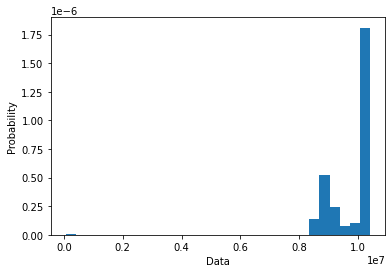

In [76]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.hist(pb1.ss1, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [111]:
pb1ratios = []
pb1ss1r = ((10079711.567 + 10425261.0)/2) / ((8351964.4 + 8697513.833)/2)
pb1ss2r = ((9506648.5 + 9831673.0)/2)/((8206550.5+ 8531575.0)/2)
pb1ss3r = ((13755599.933 +14225782.0)/2)/((10934507.533 + 11404689.6)/2)
pb1ratios.append(pb1ss1r)
pb1ratios.append(pb1ss2r)
pb1ratios.append(pb1ss3r)

In [116]:
import pandas as pd
import numpy as np
pb2 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb2_intenisty_v_2.csv',index_col= 0)
row296 = [10124840,9678722,13489710]
row304 = [10006969,9624519,13700271]
pb2.loc[296] = row296
pb2.loc[304] = row304
pb2.ss1 = pd.to_numeric(pb2.ss1, errors='coerce').astype('Int32')
pb2.ss2 = pd.to_numeric(pb2.ss2, errors='coerce').astype('Int32')
pb2.ss3 = pd.to_numeric(pb2.ss3, errors='coerce').astype('Int32')
pb2['ss3'].value_counts(normalize=False, sort=True, ascending=True, bins=960, dropna=True)
freqtable = pd.DataFrame(pb2['ss3'].value_counts(bins = 30))
freqtable.columns = ['Count']
freqtable['Cords'] = freqtable.index
freqtable['sortkey']=freqtable.Cords.map(lambda x : x.left)
freqtable=freqtable.sort_values('sortkey')
freqtable

Count                         Cords  \
(131328.839, 606610.667]          1      (131328.839, 606610.667]   
(606610.667, 1068049.333]         0     (606610.667, 1068049.333]   
(1068049.333, 1529488.0]          0      (1068049.333, 1529488.0]   
(1529488.0, 1990926.667]          0      (1529488.0, 1990926.667]   
(1990926.667, 2452365.333]        0    (1990926.667, 2452365.333]   
(2452365.333, 2913804.0]          0      (2452365.333, 2913804.0]   
(2913804.0, 3375242.667]          0      (2913804.0, 3375242.667]   
(3375242.667, 3836681.333]        0    (3375242.667, 3836681.333]   
(3836681.333, 4298120.0]          0      (3836681.333, 4298120.0]   
(4298120.0, 4759558.667]          0      (4298120.0, 4759558.667]   
(4759558.667, 5220997.333]        0    (4759558.667, 5220997.333]   
(5220997.333, 5682436.0]          0      (5220997.333, 5682436.0]   
(5682436.0, 6143874.667]          0      (5682436.0, 6143874.667]   
(6143874.667, 6605313.333]        0    (6143874.667, 6605313.333]   
(6605313.333, 7066752.0]          0      (6605313.333, 7066752.0]   
(7066752.0, 7528190.667]          0      (7066752.0, 7528190.667]   
(7528190.667, 7989629.333]        0    (7528190.667, 7989629.333]   
(7989629.333, 8451068.0]          0      (7989629.333, 8451068.0]   
(8451068.0, 8912506.667]          0      (8451068.0, 8912506.667]   
(8912506.667, 9373945.333]        0    (8912506.667, 9373945.333]   
(9373945.333, 9835384.0]          0      (9373945.333, 9835384.0]   
(9835384.0, 10296822.667]         0     (9835384.0, 10296822.667]   
(10296822.667, 10758261.333]      0  (10296822.667, 10758261.333]   
(10758261.333, 11219700.0]       21    (10758261.333, 11219700.0]   
(11219700.0, 11681138.667]      264    (11219700.0, 11681138.667]   
(11681138.667, 12142577.333]     69  (11681138.667, 12142577.333]   
(12142577.333, 12604016.0]       18    (12142577.333, 12604016.0]   
(12604016.0, 13065454.667]       11    (12604016.0, 13065454.667]   
(13065454.667, 13526893.333]    129  (13065454.667, 13526893.333]   
(13526893.333, 13988332.0]      589    (13526893.333, 13988332.0]   

                                   sortkey  
(131328.839, 606610.667]      1.313288e+05  
(606610.667, 1068049.333]     6.066107e+05  
(1068049.333, 1529488.0]      1.068049e+06  
(1529488.0, 1990926.667]      1.529488e+06  
(1990926.667, 2452365.333]    1.990927e+06  
(2452365.333, 2913804.0]      2.452365e+06  
(2913804.0, 3375242.667]      2.913804e+06  
(3375242.667, 3836681.333]    3.375243e+06  
(3836681.333, 4298120.0]      3.836681e+06  
(4298120.0, 4759558.667]      4.298120e+06  
(4759558.667, 5220997.333]    4.759559e+06  
(5220997.333, 5682436.0]      5.220997e+06  
(5682436.0, 6143874.667]      5.682436e+06  
(6143874.667, 6605313.333]    6.143875e+06  
(6605313.333, 7066752.0]      6.605313e+06  
(7066752.0, 7528190.667]      7.066752e+06  
(7528190.667, 7989629.333]    7.528191e+06  
(7989629.333, 8451068.0]      7.989629e+06  
(8451068.0, 8912506.667]      8.451068e+06  
(8912506.667, 9373945.333]    8.912507e+06  
(9373945.333, 9835384.0]      9.373945e+06  
(9835384.0, 10296822.667]     9.835384e+06  
(10296822.667, 10758261.333]  1.029682e+07  
(10758261.333, 11219700.0]    1.075826e+07  
(11219700.0, 11681138.667]    1.121970e+07  
(11681138.667, 12142577.333]  1.168114e+07  
(12142577.333, 12604016.0]    1.214258e+07  
(12604016.0, 13065454.667]    1.260402e+07  
(13065454.667, 13526893.333]  1.306545e+07  
(13526893.333, 13988332.0]    1.352689e+07

In [118]:
pb2ratios = []
pb2ss1r = ((9847058.333 +10184356.0)/2) / ((8497867.667 + 8835165.333)/2)
pb2ss2r = ((9414354.567 +9735630.0)/2)/((8129252.833+ 8450528.267)/2)
pb2ss3r = ((13526893.333 +13988332.0)/2)/((10758261.333 +11219700.0)/2)
pb2ratios.append(pb2ss1r)
pb2ratios.append(pb2ss2r)
pb2ratios.append(pb2ss3r)

In [99]:
pb3 = pd.read_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb3_intenisty_v_2.csv',index_col = 0)
row415 = [9270561,8057882,9847313]
row417 = [7243443,6958545,9555335]
pb3.loc[415] = row415
pb3.loc[417] = row417
pb3.drop(index=pb3.index[[481, 764,838]], axis=0, inplace=True)
pb3.ss1 = pd.to_numeric(pb3.ss1, errors='coerce').astype('Int32')
pb3.ss2 = pd.to_numeric(pb3.ss2, errors='coerce').astype('Int32')
pb3.ss3 = pd.to_numeric(pb3.ss3, errors='coerce').astype('Int32')
pb3['ss3'].value_counts(normalize=False, sort=True, ascending=True, bins=960, dropna=True)
freqtable = pd.DataFrame(pb3['ss3'].value_counts(bins = 30))
freqtable.columns = ['Count']
freqtable['Cords'] = freqtable.index
freqtable['sortkey']=freqtable.Cords.map(lambda x : x.left)
freqtable=freqtable.sort_values('sortkey')
freqtable


Count                           Cords  \
(107180.81199999999, 711144.9]      2  (107180.81199999999, 711144.9]   
(711144.9, 1297517.8]               1           (711144.9, 1297517.8]   
(1297517.8, 1883890.7]              0          (1297517.8, 1883890.7]   
(1883890.7, 2470263.6]              1          (1883890.7, 2470263.6]   
(2470263.6, 3056636.5]              0          (2470263.6, 3056636.5]   
(3056636.5, 3643009.4]              0          (3056636.5, 3643009.4]   
(3643009.4, 4229382.3]              0          (3643009.4, 4229382.3]   
(4229382.3, 4815755.2]              0          (4229382.3, 4815755.2]   
(4815755.2, 5402128.1]              1          (4815755.2, 5402128.1]   
(5402128.1, 5988501.0]              0          (5402128.1, 5988501.0]   
(5988501.0, 6574873.9]              0          (5988501.0, 6574873.9]   
(6574873.9, 7161246.8]              0          (6574873.9, 7161246.8]   
(7161246.8, 7747619.7]              0          (7161246.8, 7747619.7]   
(7747619.7, 8333992.6]              1          (7747619.7, 8333992.6]   
(8333992.6, 8920365.5]            133          (8333992.6, 8920365.5]   
(8920365.5, 9506738.4]             64          (8920365.5, 9506738.4]   
(9506738.4, 10093111.3]           274         (9506738.4, 10093111.3]   
(10093111.3, 10679484.2]           78        (10093111.3, 10679484.2]   
(10679484.2, 11265857.1]            8        (10679484.2, 11265857.1]   
(11265857.1, 11852230.0]           29        (11265857.1, 11852230.0]   
(11852230.0, 12438602.9]            9        (11852230.0, 12438602.9]   
(12438602.9, 13024975.8]           12        (12438602.9, 13024975.8]   
(13024975.8, 13611348.7]            6        (13024975.8, 13611348.7]   
(13611348.7, 14197721.6]            0        (13611348.7, 14197721.6]   
(14197721.6, 14784094.5]            0        (14197721.6, 14784094.5]   
(14784094.5, 15370467.4]            0        (14784094.5, 15370467.4]   
(15370467.4, 15956840.3]            0        (15370467.4, 15956840.3]   
(15956840.3, 16543213.2]            6        (15956840.3, 16543213.2]   
(16543213.2, 17129586.1]          144        (16543213.2, 17129586.1]   
(17129586.1, 17715959.0]           91        (17129586.1, 17715959.0]   

                                     sortkey  
(107180.81199999999, 711144.9]  1.071808e+05  
(711144.9, 1297517.8]           7.111449e+05  
(1297517.8, 1883890.7]          1.297518e+06  
(1883890.7, 2470263.6]          1.883891e+06  
(2470263.6, 3056636.5]          2.470264e+06  
(3056636.5, 3643009.4]          3.056636e+06  
(3643009.4, 4229382.3]          3.643009e+06  
(4229382.3, 4815755.2]          4.229382e+06  
(4815755.2, 5402128.1]          4.815755e+06  
(5402128.1, 5988501.0]          5.402128e+06  
(5988501.0, 6574873.9]          5.988501e+06  
(6574873.9, 7161246.8]          6.574874e+06  
(7161246.8, 7747619.7]          7.161247e+06  
(7747619.7, 8333992.6]          7.747620e+06  
(8333992.6, 8920365.5]          8.333993e+06  
(8920365.5, 9506738.4]          8.920366e+06  
(9506738.4, 10093111.3]         9.506738e+06  
(10093111.3, 10679484.2]        1.009311e+07  
(10679484.2, 11265857.1]        1.067948e+07  
(11265857.1, 11852230.0]        1.126586e+07  
(11852230.0, 12438602.9]        1.185223e+07  
(12438602.9, 13024975.8]        1.243860e+07  
(13024975.8, 13611348.7]        1.302498e+07  
(13611348.7, 14197721.6]        1.361135e+07  
(14197721.6, 14784094.5]        1.419772e+07  
(14784094.5, 15370467.4]        1.478409e+07  
(15370467.4, 15956840.3]        1.537047e+07  
(15956840.3, 16543213.2]        1.595684e+07  
(16543213.2, 17129586.1]        1.654321e+07  
(17129586.1, 17715959.0]        1.712959e+07

In [100]:
pb3ratios = []
pb3ss1r = ((13421715.067+ 13881659.0)/2) / ((6982500.0+ 7442443.933)/2)
pb3ss2r = ((11721716.6+ 12122677.0)/2)/((6910191.8+7311152.2)/2)
pb3ss3r = ((17129586.1+ 17715959.0)/2)/((8333992.6+8920365.5)/2)
pb3ratios.append(pb3ss1r)
pb3ratios.append(pb3ss2r)
pb3ratios.append(pb3ss3r)

In [119]:
import pandas as pd
column_names = ["ss1r", "ss2r","ss3r"]
pb123ratios = pd.DataFrame(columns = column_names,index = ['pb1','pb2','pb3'])
pb123ratios.loc['pb1'] = pb1ratios
pb123ratios.loc['pb2'] = pb2ratios
pb123ratios.loc['pb3'] = pb3ratios
pb123ratios

ss1r      ss2r      ss3r
pb1  1.202674  1.155346  1.252569
pb2  1.155679   1.15502  1.251946
pb3  1.892789  1.676662  2.019521

In [ ]:
import os
import pandas as pd

# folder path
dir_path = r'/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/wxy215/ti64_pipeline2_data/v0_2/ti64_PB2_darkCor'

# list to store files
filenames = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        filenames.append(path)
files = pd.DataFrame(filenames)
files.to_csv('MaskingJobsList_v0_2_PB2.csv',header=False)

updated masks for alpha

In [2]:
import os
import pandas as pd
column_names = ['alpha','beta']
alphabetanew = pd.DataFrame(columns = column_names)
for file1 in os.listdir('/home/zxu4/slurm_14/'):
    try:
        line = open(os.path.join('/home/zxu4/slurm_14/',file1)).readlines()[-2][:-1]
        line1 = []
        line1.append(line)
        new_items = []
        [new_items.extend(item.split()) for item in line1]
        for i in range(len(new_items)):
            new_items[i] = float(new_items[i])
        alphabetanew.loc[len(alphabetanew.index)] = new_items 
    except:
        new_items = ['error','error']
        alphabetanew.loc[len(alphabetanew.index)] = new_items 


In [9]:
alphabetanew.to_csv('/home/zxu4/CSE_MSE_RXF131/cradle-members/mdle/zxu4/Git/zxu_pb3-cat_alpha_beta.csv')

In [4]:
alphabetanew[alphabetanew.alpha == 'error']

alpha   beta
509  error  error

In [5]:
alphabetanew.drop(index=alphabetanew.index[[509]], axis=0, inplace=True)

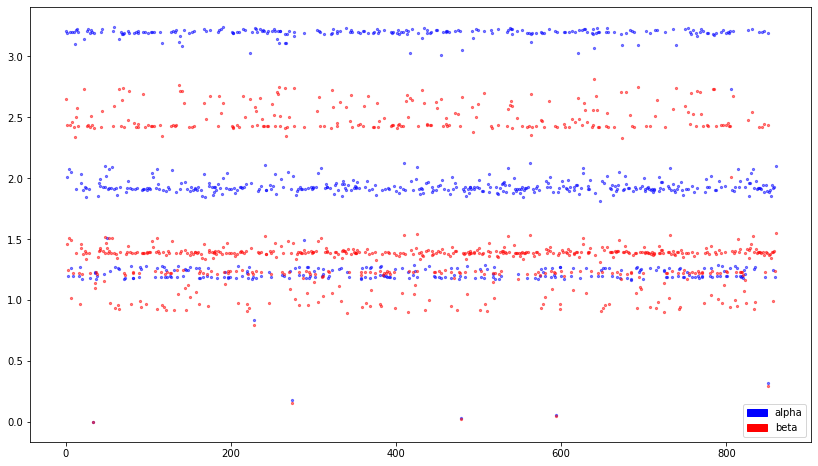

In [6]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.scatter(alphabetanew.index,alphabetanew.alpha,c = 'blue',s = 5,alpha = 0.5)
plt.scatter(alphabetanew.index,alphabetanew.beta,c = 'red',s = 5,alpha = 0.5)

bluepatch = mpatches.Patch(color='blue', label='alpha')
redpatch = mpatches.Patch(color='red', label='beta')

plt.legend(handles=[bluepatch,redpatch])

plt.show()